# Imports

In [1]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as skl
import joblib # Utilizado para salvar o modelo preditivo
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
from imblearn.under_sampling import ClusterCentroids
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import tensorflow as tf
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



# Analise de Dados

In [3]:
df_original = pd.read_csv('/content/treino.csv')

In [4]:
df_original.shape

(110000, 11)

In [5]:
df_original.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
#verificando dados nulos
df_original.isnull().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

In [7]:
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

In [8]:
df_original.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
#valores nulos serao substituidos pela media entre a linha de cima e a de baixo do mesmo
for index, row in df_original.iterrows():

    if index > 1:

        if pd.isnull(row['salario_mensal']):
            df_original.loc[index, 'salario_mensal'] = (df_original.loc[index-1,'salario_mensal']+df_original.loc[index-2,  'salario_mensal'])/2

        if pd.isnull(row['numero_de_dependentes']):
            df_original.loc[index, 'numero_de_dependentes'] = (df_original.loc[index-1,'numero_de_dependentes']+df_original.loc[index-2,'numero_de_dependentes'])/2


    else:

        if pd.isnull(row['salario_mensal']):
            df_original.loc[index, 'salario_mensal '] = (df_original.loc[index+2,'salario_mensal ']+df_original.loc[index+1,  'salario_mensal'])/2

        if pd.isnull(row['numero_de_dependentes']):
            df_original.loc[index, 'numero_de_dependentes'] =     (df_original.loc[index+2,'numero_de_dependentes']+df_original.loc[index+1,'numero_de_dependentes'])/2

In [10]:
df_original.isnull().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         110000 non-null  float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  110000 non-null  

In [12]:
#verificando arquivos doplicados 
df_original.duplicated().sum()

60

In [13]:
#excluindo duplicados
df_original = df_original.drop_duplicates()

In [14]:
#verificando valores unicos
pd.DataFrame([[i, len(df_original[i].unique())]for i in df_original.columns], columns=['Variable','Unique Values']).set_index('Variable')


,Unique Values
Variable,
inadimplente,2
util_linhas_inseguras,92671
idade,86
vezes_passou_de_30_59_dias,15
razao_debito,86002
salario_mensal,21032
numero_linhas_crdto_aberto,57
numero_vezes_passou_90_dias,18
numero_emprestimos_imobiliarios,28


In [15]:
#agrupando as variaveis numericas
variaveis_numericas = []
for i in df_original.columns[0:17].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  

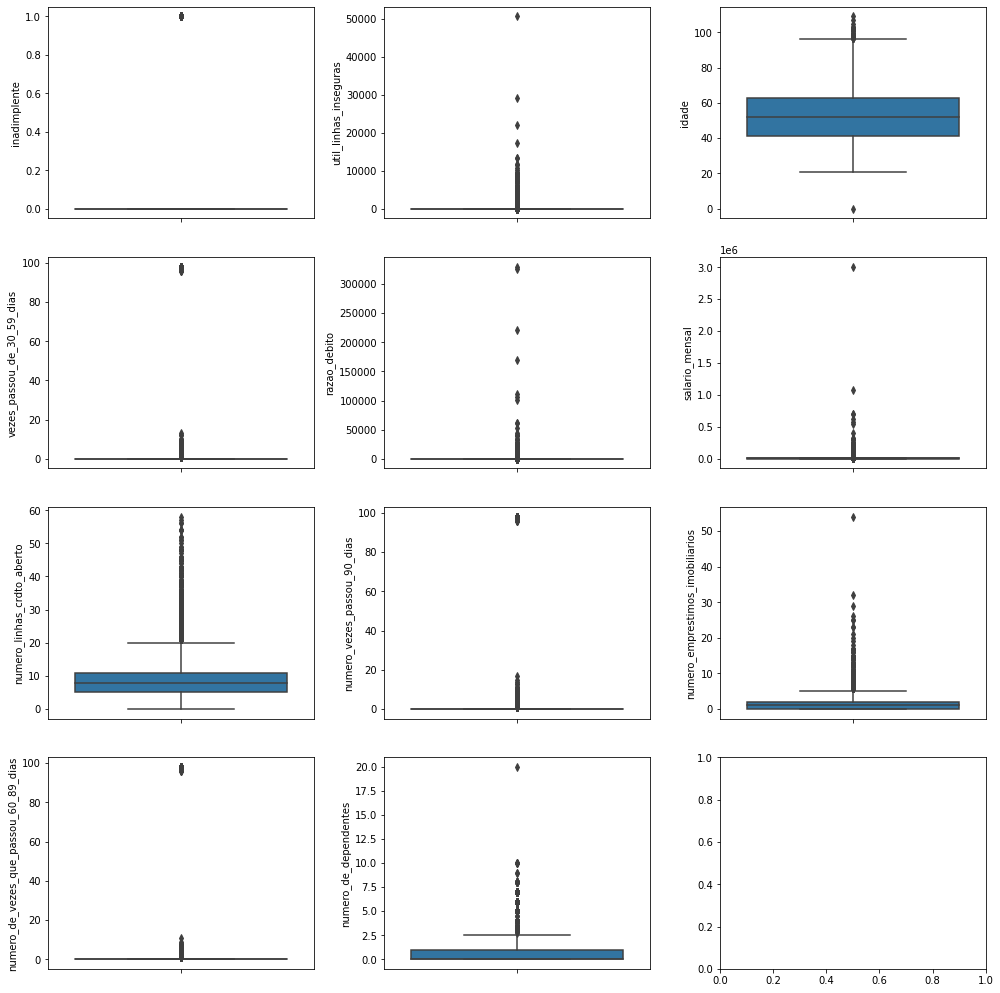

In [16]:
#boxplot para verificar outliers
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 3) #4 linhas e 3 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

# Balanceamento

In [17]:
#ver balanceamento, esta desbalanceado
target = df_original.inadimplente.value_counts()
target

0    102611
1      7329
Name: inadimplente, dtype: int64

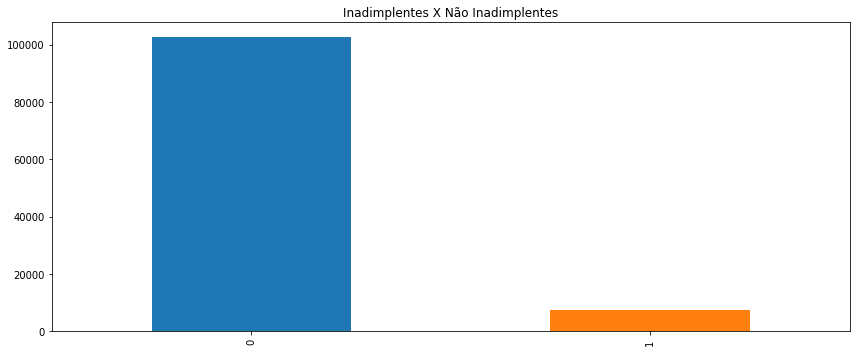

In [18]:
#grafico que mostrta o desbalanceamento
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
df_original.inadimplente.value_counts().plot(kind='bar', title='Inadimplentes X Não Inadimplentes',color = ['#1F77B4', '#FF7F0E']);

In [19]:
X = df_original.drop(columns="inadimplente")
X

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
109995,0.137396,59,1,0.448912,9600.0,10,0,2,0,0.0
109996,0.276964,46,0,0.491288,12224.0,19,0,4,0,4.0
109997,0.181257,43,0,0.382635,12000.0,13,0,2,0,2.0
109998,0.037699,86,0,0.248107,7000.0,14,0,2,0,1.0


In [20]:
y = df_original['inadimplente']
y

0         1
1         0
2         0
3         0
4         0
         ..
109995    0
109996    0
109997    0
109998    0
109999    0
Name: inadimplente, Length: 109940, dtype: int64

In [21]:
#seperando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Oversampling

In [22]:
# porcentagem para oversampling
porc = 2

# separa as classes em diferentes dataframes
df_classe0 = df_original[df_original['inadimplente']==0]
df_classe1 = df_original[df_original['inadimplente']==1]

# oversampling na classe 1. Precisa usar o parâmetro replace
df_classe1_over = df_classe1.sample(frac=porc, replace=True, random_state=10)

# junta as classes 0 e 1 novamente
df_over = pd.concat([df_classe0, df_classe1_over])

# embaralha os dados
df_over = df_over.sample(frac=1, random_state=10)

In [23]:
df_over.inadimplente.value_counts()

0    102611
1     14658
Name: inadimplente, dtype: int64

## Undersampling

In [24]:
# porcentagem para undersampling
porc = 0.3

# separa as classes em diferentes dataframes
df_classe0 = df_original[df_original['inadimplente'].values ==0]
df_classe1 = df_original[df_original['inadimplente'].values ==1]

# undersampling de 70% na classe 0
df_classe0_under = df_classe0.sample(frac=porc , random_state=10)

# junta as classes 0 e 1 novamente
df_under = pd.concat([df_classe0_under, df_classe1])

# embaralha os dados novamente
df_under = df_under.sample(frac=1, random_state=10)


In [25]:
df_under.inadimplente.value_counts()

0    30783
1     7329
Name: inadimplente, dtype: int64

In [26]:
df_original = df_over

# Separando treino e teste de novo

In [27]:
X_train = df_original.drop(columns="inadimplente")
X_train

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
35481,0.822282,44,1,0.542078,8400.0,13,0,1,0,2.0
36866,0.031603,59,0,0.003333,10500.0,6,0,0,0,0.0
32723,0.020426,30,0,0.415195,3000.0,7,0,0,0,0.0
5000,0.105212,57,0,2270.000000,2525.0,5,0,1,0,0.0
93549,0.095764,42,0,0.353781,9666.0,15,0,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...
100283,0.000000,62,0,0.000000,9350.0,2,0,0,0,0.0
54124,0.422053,58,0,6.233741,4166.0,18,0,0,0,0.0
101566,1.021796,35,0,0.052451,2916.0,1,0,0,0,0.0
63712,0.778637,44,0,2196.000000,10466.5,8,2,2,0,1.0


In [28]:
y_train = df_original['inadimplente']
y_train

35481     0
36866     0
32723     0
5000      0
93549     0
         ..
100283    0
54124     0
101566    0
63712     1
89164     0
Name: inadimplente, Length: 117269, dtype: int64

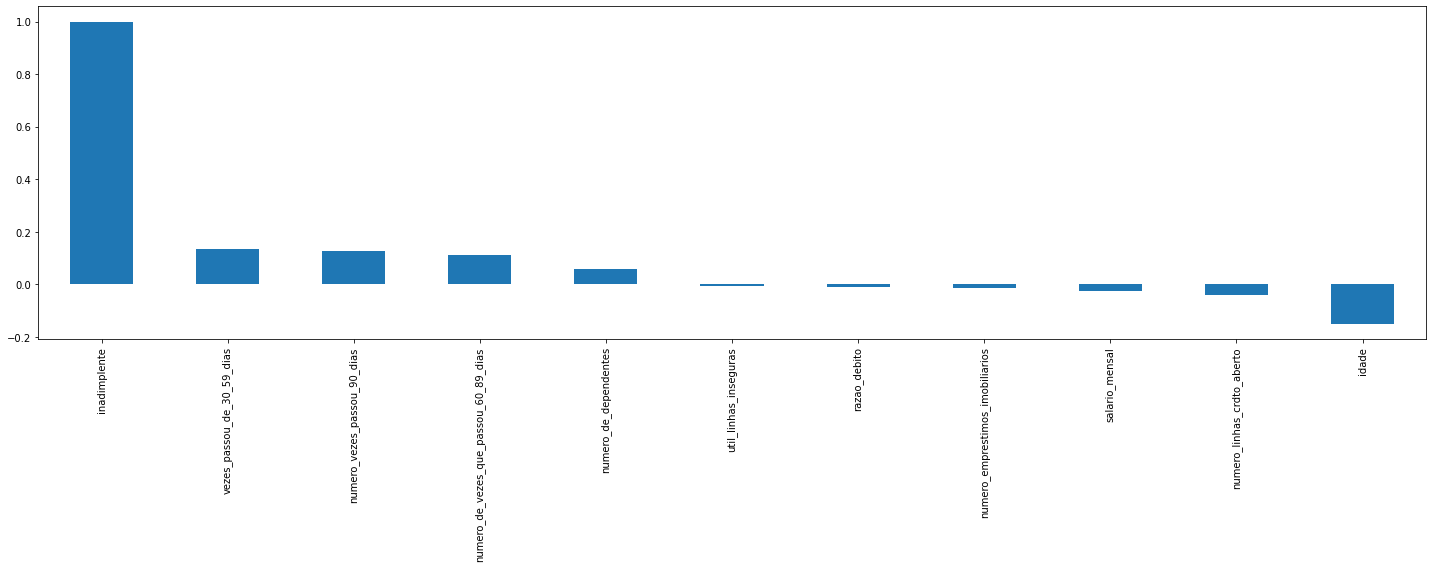

In [29]:
plt.figure(figsize=(20,8))
df_original.corr()['inadimplente'].sort_values(ascending = False).plot(kind='bar')

In [30]:
#normalizando
Normalizador = MinMaxScaler()
X_train_normalizados = Normalizador.fit_transform(X_train)

In [31]:
X_train_normalizados

array([[1.62160206e-05, 4.03669725e-01, 1.02040816e-02, ...,
        1.85185185e-02, 0.00000000e+00, 1.00000000e-01],
       [6.23226651e-07, 5.41284404e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.02809281e-07, 2.75229358e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.01505806e-05, 3.21100917e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53553131e-05, 4.03669725e-01, 0.00000000e+00, ...,
        3.70370370e-02, 0.00000000e+00, 5.00000000e-02],
       [1.70316569e-05, 4.58715596e-01, 0.00000000e+00, ...,
        1.85185185e-02, 0.00000000e+00, 1.00000000e-01]])

# Treino de Modelos

## Random Forest

In [32]:
clf = RandomForestClassifier(n_estimators  = 300)

# Construção do modelo
clf = clf.fit(X_train_normalizados, y_train)


In [33]:
random_forest = RandomForestClassifier(max_features = "sqrt", n_estimators = 300 , random_state= 4)
random_forest.fit(X= X_train, y= y_train)
rfc_predict = random_forest.predict(X= X_test)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33847
           1       1.00      0.89      0.94      2434

    accuracy                           0.99     36281
   macro avg       1.00      0.95      0.97     36281
weighted avg       0.99      0.99      0.99     36281



In [34]:
scores = clf.score(X_train_normalizados, y_train)
scores

0.9999061985691018

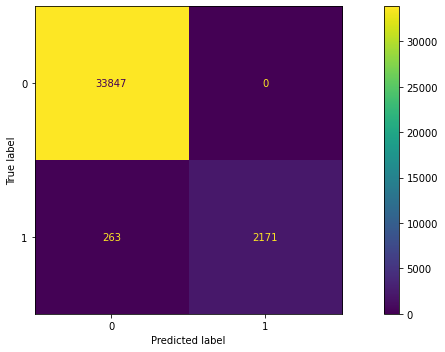

In [35]:
predictions = random_forest.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
disp.plot()
plt.show()

### Validacao cruzada

In [66]:
score = cross_val_score(clf,X,y,cv = 5, scoring = 'accuracy')

In [67]:
score

array([0.93505548, 0.93519192, 0.9354648 , 0.93605603, 0.9367837 ])

## Naive Bayes


In [36]:
#Create a Gaussian Classifier
NB = MultinomialNB()

# Train the model using the training sets
NB.fit(X = X_train,y = y_train)
NB_predict = NB.predict(X_test)
print(classification_report(y_test, NB_predict))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93     33847
           1       0.26      0.51      0.34      2434

    accuracy                           0.87     36281
   macro avg       0.61      0.70      0.64     36281
weighted avg       0.92      0.87      0.89     36281



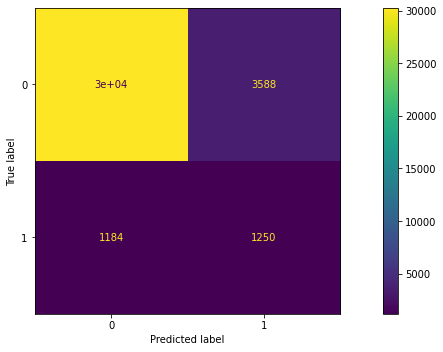

In [37]:
predictions = NB.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=NB.classes_)
disp.plot()
plt.show()

### Validacao cruzada

In [76]:
score = cross_val_score(NB,X,y,cv = 5, scoring = 'accuracy')

In [77]:
score

array([0.85701292, 0.91186102, 0.86424413, 0.22152993, 0.23512825])

## Decision Tree


In [38]:
DT = DecisionTreeClassifier(random_state=2024)
# Train the model using the training sets
DT.fit(X = X_train,y = y_train)
DT_predict = DT.predict(X_test)
print(classification_report(y_test, DT_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33847
           1       1.00      0.90      0.95      2434

    accuracy                           0.99     36281
   macro avg       1.00      0.95      0.97     36281
weighted avg       0.99      0.99      0.99     36281



In [39]:
decisionTree_params = {'criterion':['gini', 'entropy', 'log_loss']}

In [40]:
gs = GridSearchCV(DecisionTreeClassifier(random_state= 4),decisionTree_params,verbose=1,cv=3,n_jobs=-1)
gs.fit(X_train,y_train)
pred = gs.predict(X_test)
print(classification_report(y_test, pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWar

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33847
           1       1.00      0.89      0.94      2434

    accuracy                           0.99     36281
   macro avg       1.00      0.95      0.97     36281
weighted avg       0.99      0.99      0.99     36281



In [41]:
gs.best_score_


0.9241402325269342

In [42]:
gs.best_params_


{'criterion': 'entropy'}

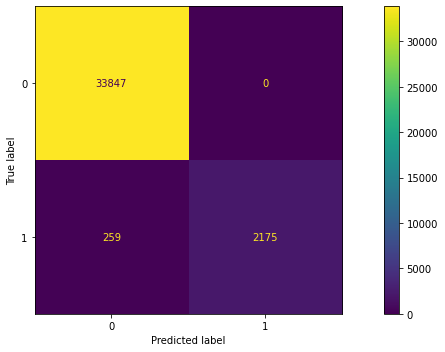

In [43]:
predictions = gs.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gs.classes_)
disp.plot()
plt.show()

### Validacao cruzada

In [71]:
score = cross_val_score(gs,X,y,cv = 5, scoring = 'accuracy')

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWar

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWar

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWar

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWar

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWar

In [72]:
score

array([0.89944515, 0.89808077, 0.90040022, 0.8978079 , 0.89980899])

## Rede Neural

In [44]:
# fazer quando você tiver várias classes ou não estiver binarizado
# LabelBinarizer = skl.preprocessing.LabelBinarizer()
# y_trainOHE = LabelBinarizer.fit_transform(y_train)
# y_testOHE = LabelBinarizer.transform(y_test)
# classesDataset = LabelBinarizer.classes_
# print('Classes: ', classesDataset)

#print(y_testOHE)

#y_trainOHE = y_train
#y_testOHE = y_test
        
# Define o número de entradas, ocultas e saídas
n_inputs = X_train.shape[1]
n_hidden1 = 52
n_outputs = 1

# Define a camada de entrada
input_layer = tf.keras.layers.Input(shape=(n_inputs,))

# Define a camada oculta
hidden_layer = tf.keras.layers.Dense(n_hidden1, activation='relu')(input_layer)

# Define a camada de saída
#output_layer = tf.keras.layers.Dense(n_outputs, activation='softmaX')(hidden_layer)
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(hidden_layer) 

# Cria o modelo
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compila o modelo
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treina o modelo
#history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3665/3665 [==============================] - 7s 2ms/step - loss: 2.5750 - accuracy: 0.8235
Epoch 2/100
3665/3665 [==============================] - 7s 2ms/step - loss: 1.6111 - accuracy: 0.8292
Epoch 3/100
3665/3665 [==============================] - 6s 2ms/step - loss: 1.7328 - accuracy: 0.8383
Epoch 4/100
3665/3665 [==============================] - 7s 2ms/step - loss: 1.3029 - accuracy: 0.8412
Epoch 5/100
3665/3665 [==============================] - 6s 2ms/step - loss: 1.8201 - accuracy: 0.8450
Epoch 6/100
3665/3665 [==============================] - 7s 2ms/step - loss: 1.0961 - accuracy: 0.8473
Epoch 7/100
3665/3665 [==============================] - 6s 2ms/step - loss: 1.1540 - accuracy: 0.8493
Epoch 8/100
3665/3665 [==============================] - 7s 2ms/step - loss: 1.1494 - accuracy: 0.8507
Epoch 9/100
3665/3665 [==============================] - 6s 2ms/step - loss: 2.1323 - accuracy: 0.8547
Epoch 10/100
3665/3665 [==============================] - 7s 2ms/step - l

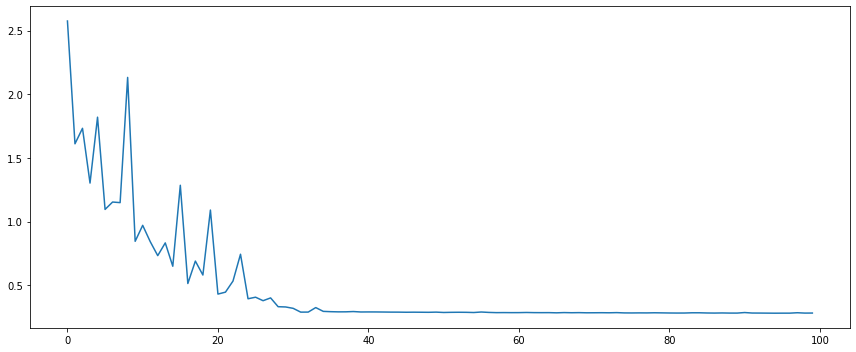

In [73]:
hist = pd.DataFrame(history.history['loss'])

plt.plot(hist)
plt.show()

In [46]:
test_results = model.evaluate(X_test, y_test, verbose=0)
print('Acuracia: %1.3f' %test_results[1])

#print(model)
pred = model.predict(X_test)

pred_bin = (pred > 0.5).astype("int32")

print(classification_report(y_test, pred_bin))

Acuracia: 0.913
1134/1134 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     33847
           1       0.39      0.50      0.44      2434

    accuracy                           0.91     36281
   macro avg       0.68      0.72      0.69     36281
weighted avg       0.92      0.91      0.92     36281



# Fazendo previsoes na base de teste 

In [48]:
#fazendo load do modelo 
clf = joblib.load('/content/datariskcase.pk')

In [49]:
df_original = pd.read_csv('/content/teste.csv')

In [50]:
variaveis_numericas = []
for i in df_original.columns[0:17].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  
#valores nulos sera substituidos pela media entre a linha de cima e a de baixo do mesmo
for index, row in df_original.iterrows():

    if index > 1:

        if pd.isnull(row['salario_mensal']):
            df_original.loc[index, 'salario_mensal'] = (df_original.loc[index-1,'salario_mensal']+df_original.loc[index-2,  'salario_mensal'])/2

        if pd.isnull(row['numero_de_dependentes']):
            df_original.loc[index, 'numero_de_dependentes'] = (df_original.loc[index-1,'numero_de_dependentes']+df_original.loc[index-2,'numero_de_dependentes'])/2


    else:

        if pd.isnull(row['salario_mensal']):
            df_original.loc[index, 'salario_mensal '] = (df_original.loc[index+2,'salario_mensal ']+df_original.loc[index+1,  'salario_mensal'])/2

        if pd.isnull(row['numero_de_dependentes']):
            df_original.loc[index, 'numero_de_dependentes'] =     (df_original.loc[index+2,'numero_de_dependentes']+df_original.loc[index+1,'numero_de_dependentes'])/2

            variaveis_numericas = []
for i in df_original.columns[0:17].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  


preditoras = df_original.iloc[:, 1:10]  
target = df_original.iloc[:, 0] 


# Separar variaveis preditoras
PREDITORAS = df_original.iloc[:, 0:15]          
    

# Fazendo a normalização dos dados    
Normalizador = MinMaxScaler()
dados_normalizados = Normalizador.fit_transform(PREDITORAS)

previsoes = clf.predict(dados_normalizados)
probabilidades = clf.predict_proba(dados_normalizados)
df_original['inadimplentes'] = previsoes
df_original['PROBABILIDADES'] = probabilidades[:, 1]
df_original.head()


,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplentes,PROBABILIDADES
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0,0.038535
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,0,0.404000
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0,0.026792
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,0,0.120000
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0,0.033294


In [56]:
df_original.to_excel('resultadocase.xlsx', index = False)

In [57]:
read_file = pd.read_excel (r'/content/resultadocase.xlsx')
read_file.to_csv (r'/content/casepronto.csv', index = None, header=True)